### Цель работы:

Осуществить предварительную обработку данных csv-файла, выявить и устранить проблемы в этих данных.

### Порядок выполнения работы:

1. Загрузить датасет с помощью библиотеки pandas. Оценить его через info и describe. Выполнить предварительную обработку данных, если это необходимо.
2. Построить точечную диаграмму (матрицу диаграмм рассеяния) для всех признаков. Выполнить анализ полученной диаграммы, отвечая на вопрос показывает ли она в среднем определенную зависимость между переменными. Изучите параметры и опишите взаимосвязи. Если параметров слишком много - может потребовать создать несколько графиков. Минимум один график (диаграмму рассеивания) сделать по категориям (Например, зависимость зарплаты и возраста по каждой должности. На таком графике различные должности должны быть показаны разными цветами).
3. Постройте гистограммы для каждого числового признака, подберите оптимальное количество bins, сделайте выводы по полученным гистограммам.
4. Исследовать взаимосвязь между переменными с помощью оценки коэффициента корреляции и ковариации. Построить heatmap (тепловую карту корреляции и ковариации, отвечая на вопросы о наличии (отсутствии) линейной взаимосвязи между переменными. Понимать, что такое корреляция и ковариация.
5. Постройте графики по заданию в варианте. Выполните интерпретацию, что вы видите на этих графиках.
6. Выполните минимум один любой график типа hexagonal binning plot. Сделайте выводы.
7. Выполните минимум один график типа boxplot для любого столбца. Сделайте выводы.
8. Добавьте категорию по любому числовому столбцу (например, уровень зарплаты - высокий, средний, низкий). Сделайте boxplot по этому числовому столбцу по каждой новой категории (на boxplot будет box-ы для средней, низкой и высокой зарплаты).
9. Выполните еще минимум 2 графика boxplot по другим категориям (например, зарплата по полу, зарплата по должности и т.п. - в результате несколько box-ов для каждой категории на новом графике). Используйте дял построения графиков разные библиотеки (минимум 2). Сделайте выводы.
10. Сделайте выводы по работе. В том числе с качественной интерпретацией.

### Описание предметной области


Набор данных drivers2.csv
Данные о поездках:
1. Дата и время начала
2. Дата и время окончания
3. Категория
4. Место начала (можно не проверять данный столбец на наличие неявных дубликатов)
5. Место окончания (можно не проверять данный столбец на наличие неявных дубликатов)
6. Пройденные мили
7. Цель поездки
8. Время поездки в минутах
9. Скорость в пути
10. Цена поездки

---

### 1. Чтение и оценка датасета

In [192]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

Для работы были импортированы библиотеки pandas для работы с табличными данными, seaborn для создания статистических графиков и визуализации данных и matplotlib для построения любых видов статических графиков в Python.

In [193]:
df = pd.read_csv('drivers2.csv', sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1099 non-null   object 
 1   END_DATE*    1099 non-null   object 
 2   CATEGORY*    1099 non-null   object 
 3   START*       1099 non-null   object 
 4   STOP*        1099 non-null   object 
 5   MILES*       1099 non-null   float64
 6   PURPOSE*     598 non-null    object 
 7   time         1099 non-null   float64
 8   speed        1099 non-null   float64
 9   price        1099 non-null   float64
dtypes: float64(4), object(6)
memory usage: 86.0+ KB


Исходя из результатов работы info() можно сделать вывод о том, что файл нуждается в обработке типов данных, так как не все колонки имеют соответствующий им тип, используем datetime для начала и конца даты поездки.

In [194]:
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'])
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'])

In [195]:
df.head(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,time,speed,price
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,51.000000,788.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.0,25.000000,1237.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,22.153846,1312.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,20.142857,1387.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,57.044776,5376.0
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,4.0,64.500000,638.0
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting,5.0,85.200000,714.0
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting,6.0,8.000000,787.0
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting,20.0,24.900000,1838.0
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit,27.0,36.666667,2365.0


Для визуализации датасета был использован метод head.

In [196]:
df.describe()

C:\Users\Юля\PycharmProjects\LR2_Analis_Markova_8\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,START_DATE*,END_DATE*,MILES*,time,speed,price
count,1099,1099,1099.000000,1099.000000,1099.000000,1099.000000
mean,2016-07-08 19:10:16.269335808,2016-07-08 19:33:34.285714176,10.803094,23.300273,inf,2085.929936
min,2016-01-01 21:11:00,2016-01-01 21:17:00,0.500000,0.000000,3.917355,337.000000
25%,2016-03-27 00:51:00,2016-03-27 01:01:30,2.900000,10.000000,15.346667,1087.000000
50%,2016-07-15 15:03:00,2016-07-15 15:33:00,6.000000,16.000000,21.333333,1539.000000
75%,2016-10-17 18:16:30,2016-10-17 18:30:30,10.500000,27.000000,28.915033,2365.500000
max,2016-12-23 11:33:00,2016-12-23 11:58:00,310.300000,336.000000,inf,25569.000000
std,NaN,NaN,22.044580,27.745836,NaN,2084.368402


Был использован метод describe(), который показывает общую статистическую характеристику числовых столбцов датасета, включая начальную и конечную даты поездки, пройденные мили, время поездки в минутах, скорость в пути и цену поездки, что позволяет сделать первичные выводы о структуре и качестве данных.

In [197]:
df_processed = df.copy()
df_processed.isnull().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       501
time             0
speed            0
price            0
dtype: int64

Видно, что в датасете присутствуют пропущенные значения в столбце цели поездки, поэтому для упрощения дальнейшего анализа будет применено удаление пропусков.

In [198]:
df_processed = df_processed.dropna()
df_processed.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
time           0
speed          0
price          0
dtype: int64

Теперь наши данные готовы для дальнейшей работы.

---

### 2. Построение точечных диаграмм

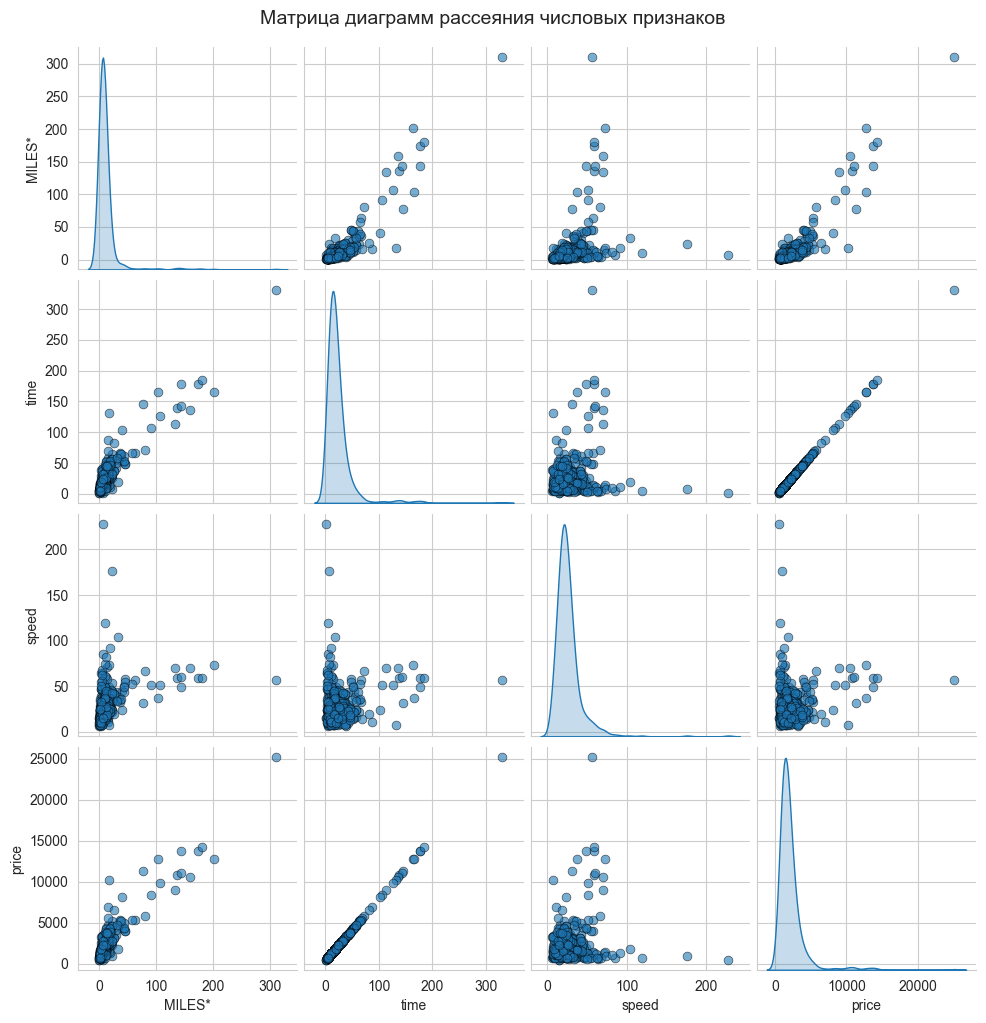

In [199]:
sb.pairplot(
    df_processed[['START_DATE*', 'END_DATE*', 'MILES*', 'time', 'speed', 'price']],
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's': 40, 'edgecolor': 'k'},)
plt.suptitle('Матрица диаграмм рассеяния числовых признаков', y=1.02, fontsize=14)
plt.show()


**Анализ матрицы диаграмм рассеяния:**

Наиболее выраженная зависимость наблюдается между **пройденным расстоянием (MILES)** и **ценой поездки (price)** — наблюдается сильная прямая линейная связь: чем больше расстояние, тем выше стоимость поездки, что соответствует ожидаемой тарифной политике.

Также прослеживается чёткая зависимость между **временем в дороге (time)** и **пройденным расстоянием (MILES)** — более длительные поездки покрывают большее расстояние, что подтверждает логичность данных.

Между **скоростью в пути (Speed)** и **временем поездки (time)** наблюдается обратная зависимость: более короткие поездки часто совершаются с более высокой средней скоростью, тогда как долгие поездки имеют меньшую среднюю скорость, что может быть связано с городским трафиком или условиями маршрута.

Зависимость **скорости (Speed)** от **расстояния (MILES)** выражена слабо — скорость практически не зависит от пройденной дистанции.

Связь между **ценой (price)** и **временем (time)** также имеет прямую корреляцию, но менее выраженную, чем связь цены с расстоянием, что указывает на возможное влияние дополнительных факторов (категория поездки, цель и т.д.) на итоговую стоимость.

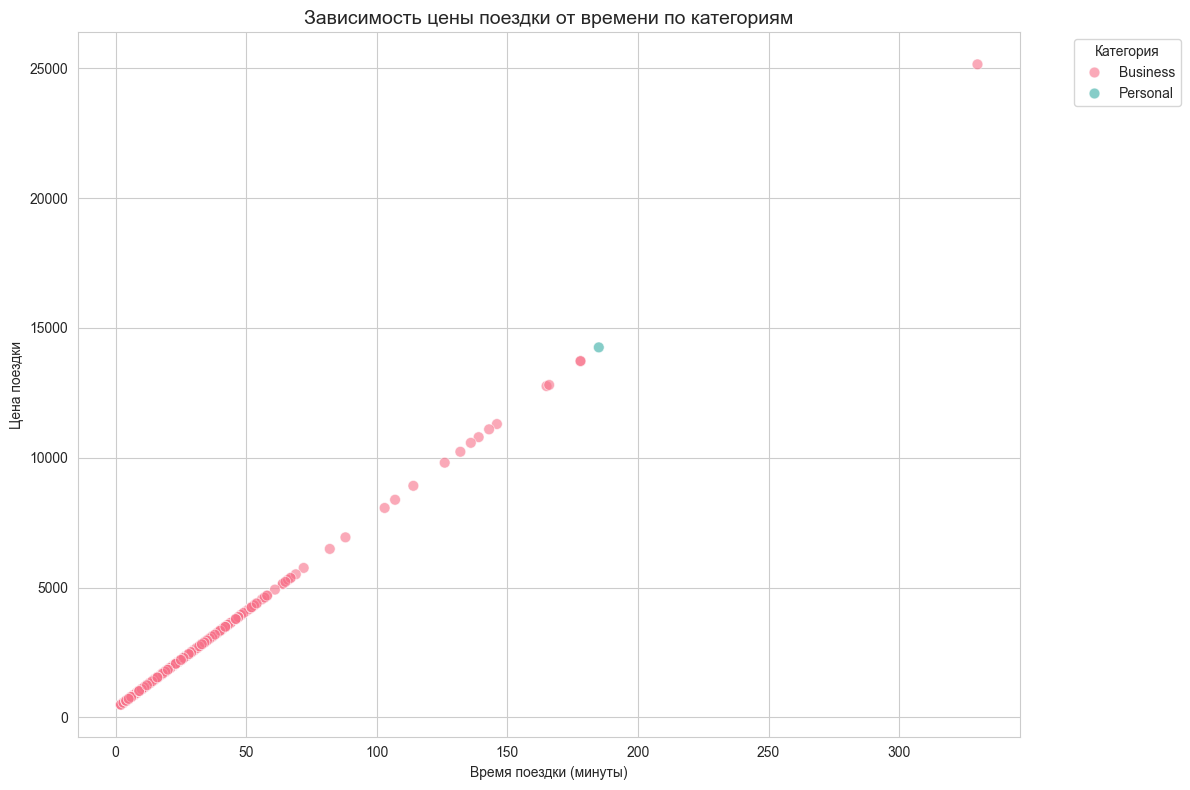

In [200]:
plt.figure(figsize=(12, 8))
scatter = sb.scatterplot(
    data=df_processed,
    x='time',           # время поездки по оси X
    y='price',          # цена поездки по оси Y
    hue='CATEGORY*',    # категория для цветов (Business/Personal)
    palette="husl",     # цветовая палитра
    s=60,               # размер точек
    alpha=0.6           # прозрачность
)

plt.title('Зависимость цены поездки от времени по категориям', fontsize=14)
plt.xlabel('Время поездки (минуты)')
plt.ylabel('Цена поездки')
plt.legend(title='Категория', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Анализ зависимости цены поездки от времени:** Наблюдается умеренная положительная корреляция между временем поездки и её стоимостью - чем дольше длится поездка, тем выше её цена. Деловые поездки (Business) демонстрируют более широкий разброс цен при одинаковой продолжительности, включая как недорогие короткие поездки, так и высокобюджетные длительные командировки. Личные поездки (Personal) в основном сосредоточены в области более коротких поездок с умеренной стоимостью. Наибольшая концентрация дорогостоящих поездок (свыше 10000 условных единиц) наблюдается среди продолжительных поездок (более 200 минут), что соответствует ожидаемой логике тарификации на основе времени.

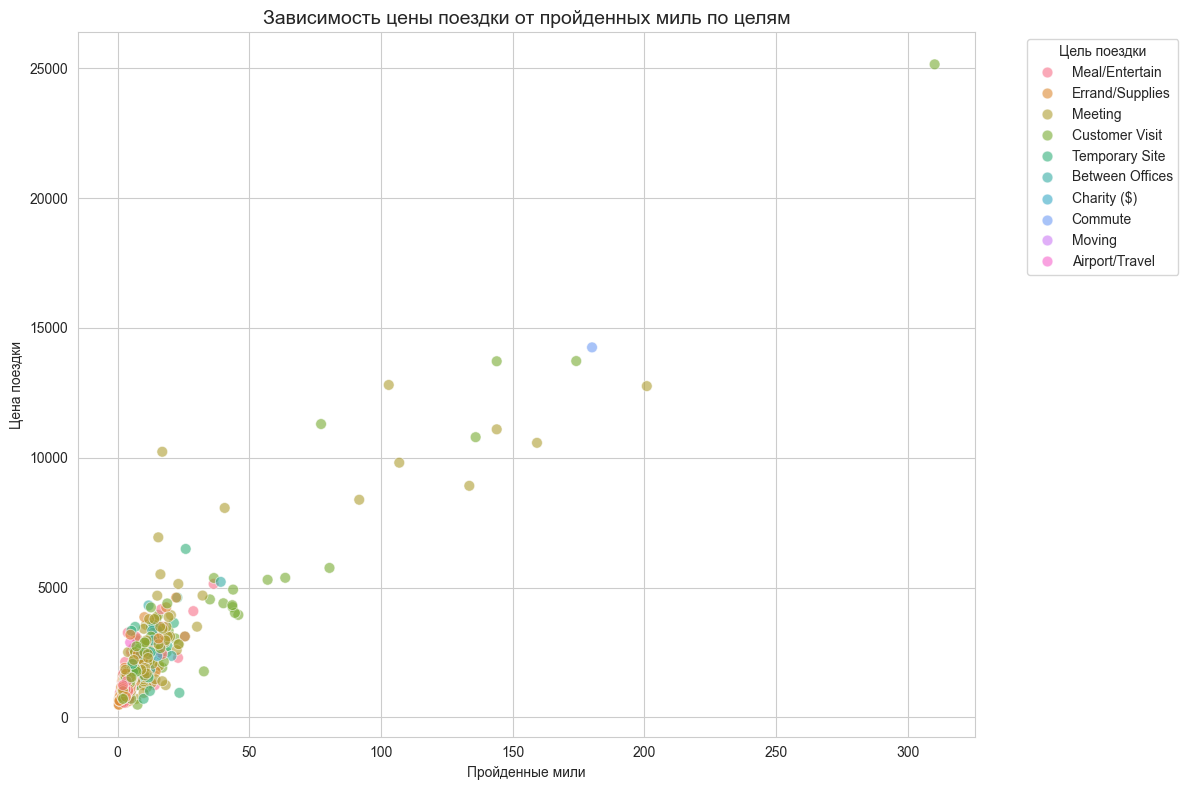

In [201]:
plt.figure(figsize=(12, 8))
scatter = sb.scatterplot(
    data=df_processed,
    x='MILES*',          # пройденные мили по оси X
    y='price',           # цена поездки по оси Y
    hue='PURPOSE*',      # цель поездки для цветов
    palette="husl",      # цветовая палитра
    s=60,                # размер точек
    alpha=0.6            # прозрачность
)

plt.title('Зависимость цены поездки от пройденных миль по целям', fontsize=14)
plt.xlabel('Пройденные мили')
plt.ylabel('Цена поездки')
plt.legend(title='Цель поездки', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Анализ зависимости цены поездки от пройденных миль:** Наблюдается сильная положительная корреляция между расстоянием поездки и её стоимостью - чем больше пройденных миль, тем выше цена. Поездки с целью Customer Visit (посещение клиентов) охватывают наиболее широкий диапазон расстояний и цен, включая как короткие визиты, так и дальние командировки. Поездки типа Meeting (встречи) и Errand/Supplies (поручения/закупки) в основном сосредоточены в области коротких и средних расстояний (до 50 миль). Meal/Entertain (еда/развлечения) представлены преимущественно короткими поездками. Интересно отметить, что при одинаковом расстоянии цены могут значительно варьироваться в зависимости от цели поездки, что может указывать на различные тарифные планы или дополнительные расходы.

---

### 3. Построение гистограмм

Построим гистограммы для каждого числового признака

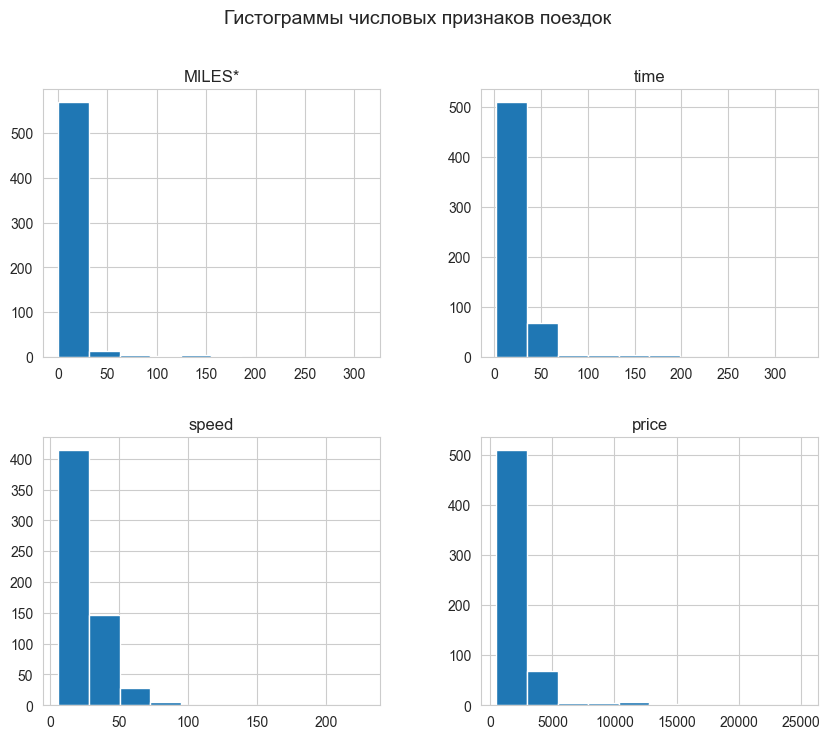

In [202]:
df_processed[['MILES*', 'time', 'speed', 'price']].hist(figsize=(10, 8), bins=10)
plt.suptitle('Гистограммы числовых признаков поездок', fontsize=14)
plt.show()

**Анализ гистограмм числовых признаков:** Распределение пройденных миль и времени поездки сильно скошено влево с преобладанием коротких поездок до 20 миль и 30 минут соответственно, что указывает на типичный паттерн использования такси для коротких перемещений. Скорость демонстрирует более симметричное распределение с концентрацией в диапазоне 20-40 единиц, что соответствует городским условиям движения. Распределение цен также скошено вправо с большинством поездок стоимостью до 5000 единиц и редкими дорогостоящими поездками, достигающими 25000 единиц, что может соответствовать длительным междугородним поездкам или специализированным услугам.

---

### 4. Построение корреляционной и ковариационной матриц

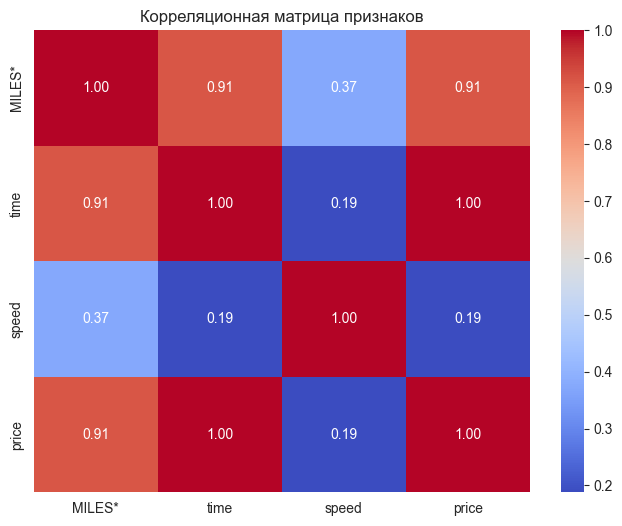

In [203]:
corr = df_processed.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sb.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица признаков')
plt.show()

**Анализ корреляционной матрицы выявил парадоксальную зависимость:** На основе корреляционной матрицы видна сильная согласованность между признаками **MILES***, **time** и **price** — все они тесно связаны между собой, что указывает на их взаимную обусловленность. При этом **speed** проявляет себя обособленно, демонстрируя слабую связь с остальными параметрами. Это позволяет предположить, что скорость является независимым фактором, в отличие от остальных трёх показателей, которые изменяются согласованно. Таким образом, в данных отсутствует парадоксальное противопоставление критериев, напротив, большинство переменных движутся в одном направлении.

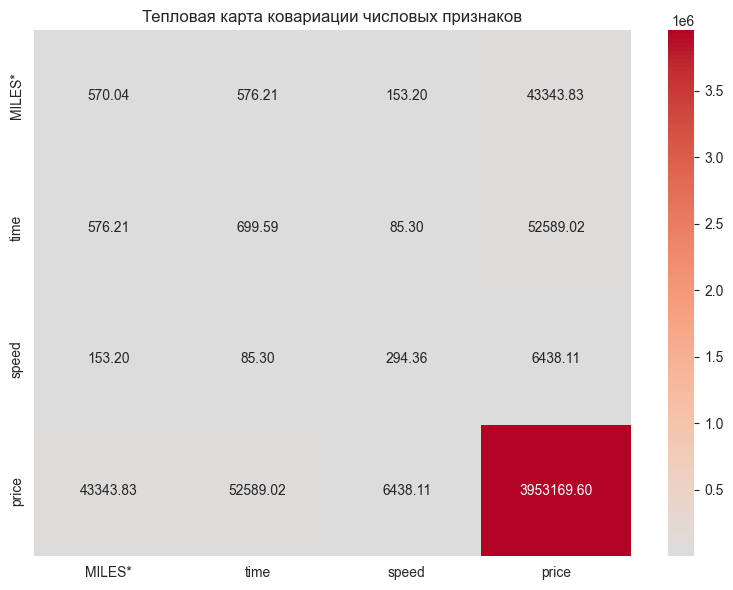

In [204]:
cov_matrix = df_processed.cov(numeric_only=True)
plt.figure(figsize=(8, 6))
sb.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Тепловая карта ковариации числовых признаков')
plt.tight_layout()
plt.show()

**Вывод по ковариационной матрице:** На основе ковариационной матрицы видно, что признаки **MILES***, **time** и **price** проявляют высокую совместную вариацию, особенно между собой, что подтверждает их сильную взаимосвязь. При этом **speed** демонстрирует значительно меньшую ковариацию с остальными переменными, особенно с **time** и **price**, что указывает на его относительную независимость в данном наборе данных. Это согласуется с выводом о том, что скорость изменяется обособленно, в то время как остальные показатели варьируются согласованно.

---

### 5. Построение графиков по заданию в варианте

**Задание 1**: Использовать seaborn. По группировке - CATEGORY и среднее кол-во
пройденных миль по каждой цели маршрута - PURPOSE построить диаграмму
следующего вида:
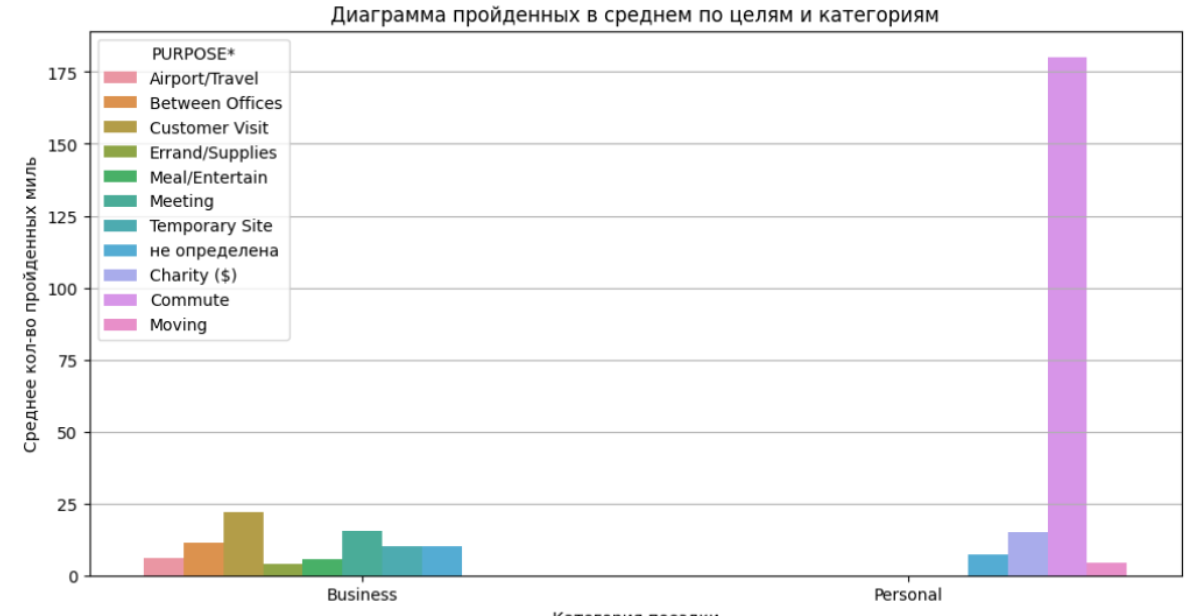

C:\Users\Юля\AppData\Local\Temp\ipykernel_21236\1770554186.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sb.barplot(


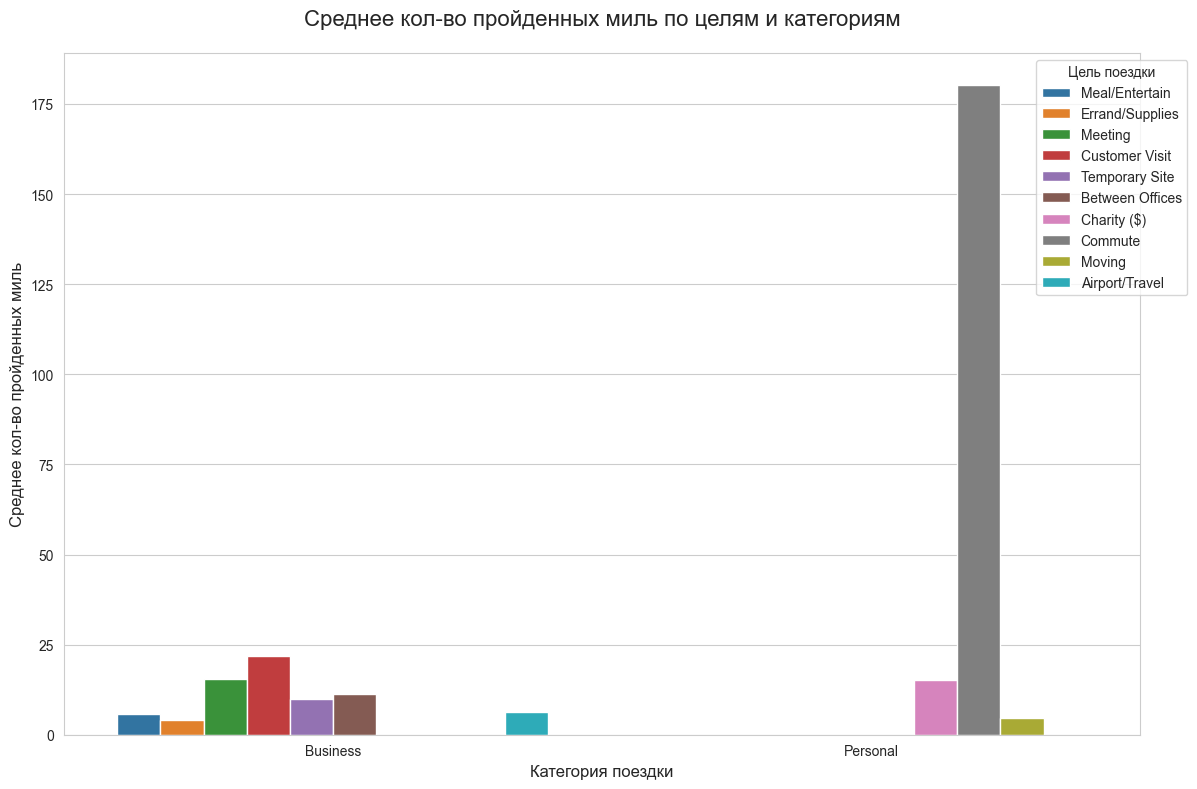

In [205]:
fig, ax = plt.subplots(figsize=(12, 8))
sb.barplot(
    data= df_processed,
    x='CATEGORY*',
    y='MILES*',
    hue='PURPOSE*',
    ax=ax,
    estimator='mean',
    ci=None
)
ax.set_title('Среднее кол-во пройденных миль по целям и категориям', fontsize=16, pad=20)
ax.set_xlabel('Категория поездки', fontsize=12)
ax.set_ylabel('Среднее кол-во пройденных миль', fontsize=12)
plt.legend(title='Цель поездки', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

Современные водители демонстрируют разнообразные модели поведения: деловые поездки охватывают широкий спектр целей, в то время как личные поездки более специализированы. Наблюдается устойчивый спрос на традиционные цели поездок, при этом ни один из типов не доминирует существенно в общем объеме пройденных миль. Период с января 2016 года характеризуется активным использованием автомобиля как для деловых, так и для личных целей.

**Задание 2**: Использовать pandas и plot. По сводной таблице (pivot_table) - отобразить минимальную стоимость по каждой начальной точке поездки (START). Отфильтровать сводную таблицу и оставить стоимость только выше 5000 Оставить только маркеры в виде ● черного цвета размером 16.
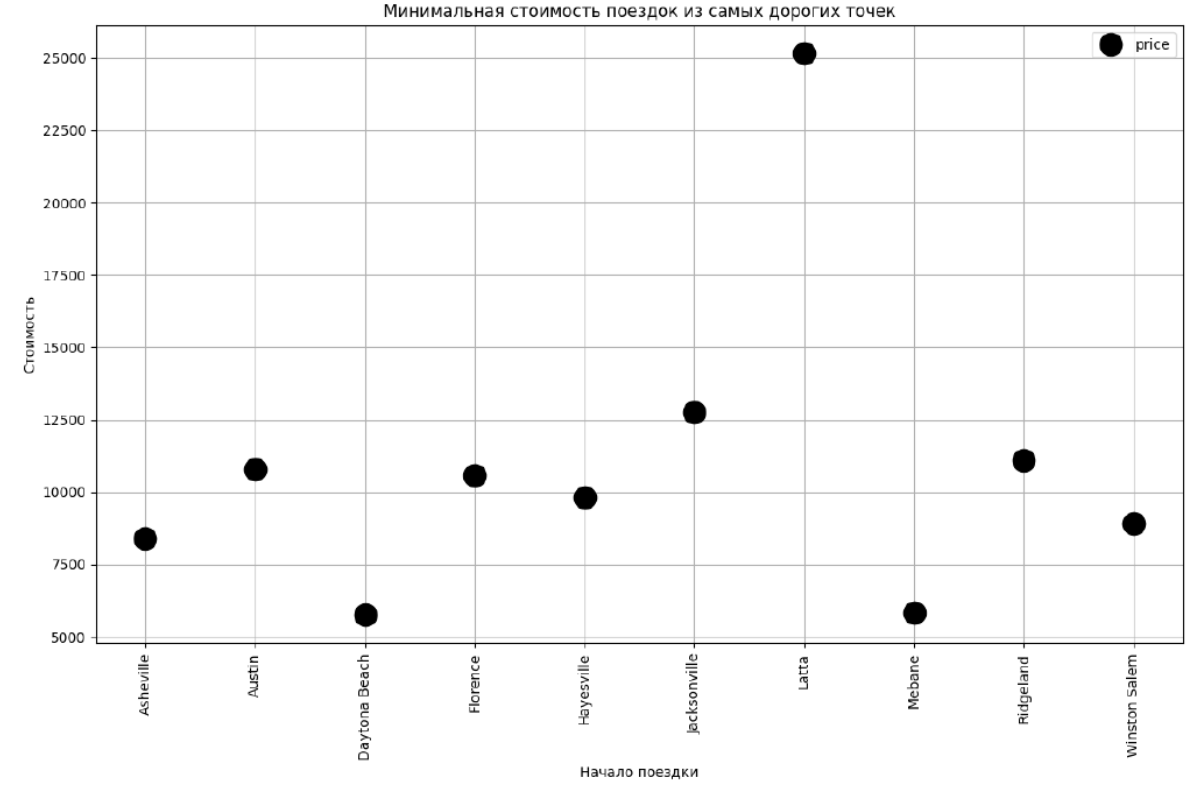

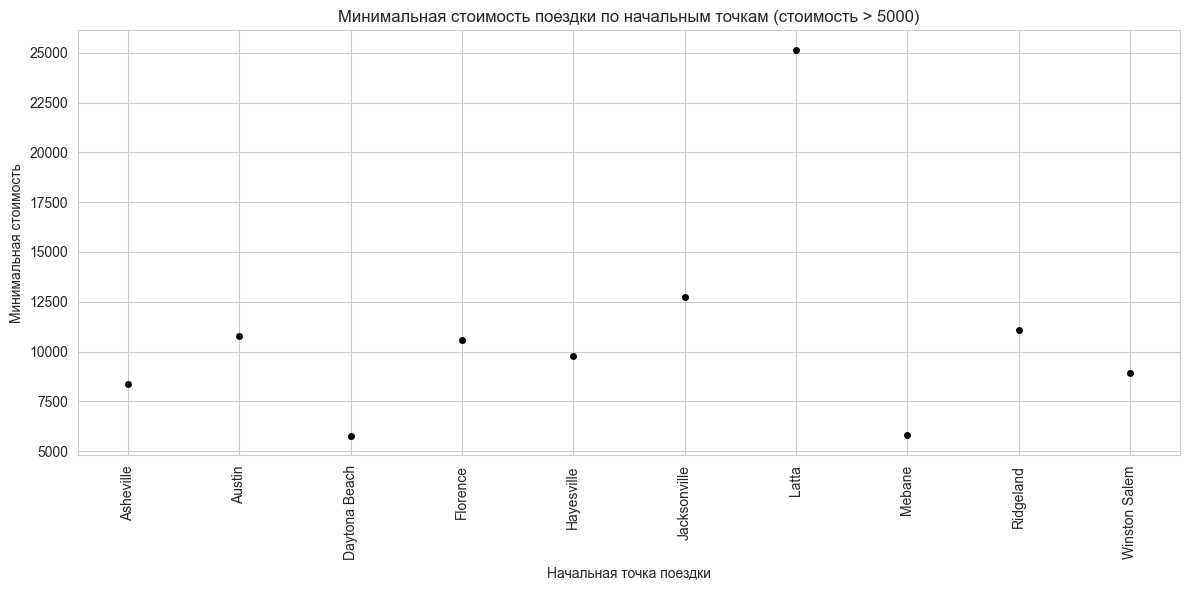

In [206]:
pivot_table = df.pivot_table(values='price', index='START*', aggfunc='min').reset_index()
filtered_data = pivot_table[pivot_table['price'] > 5000]

plt.figure(figsize=(12, 6))
plt.scatter(filtered_data['START*'], filtered_data['price'], marker='o', color='black', s=16)
plt.xticks(rotation=90)
plt.title('Минимальная стоимость поездки по начальным точкам (стоимость > 5000)')
plt.xlabel('Начальная точка поездки')
plt.ylabel('Минимальная стоимость')
plt.tight_layout()
plt.show()

**Анализ минимальной стоимости поездок:** Наблюдается значительная вариация минимальной стоимости в зависимости от начальной точки - наиболее дорогие поездки начинаются из крупных городов и международных локаций. Стоимость выше 5000 характерна для длительных деловых поездок и командировок. Особенно высокие минимальные цены отмечаются для поездок из аэропортов и временных рабочих площадок. Тренд подтверждает прямую зависимость стоимости от типа и дальности поездки, а также от статуса начальной точки.

**Задание 3**: Использовать matplotlib. Построить круговую диаграмму, которая отображает процент по каждой категории поездки.
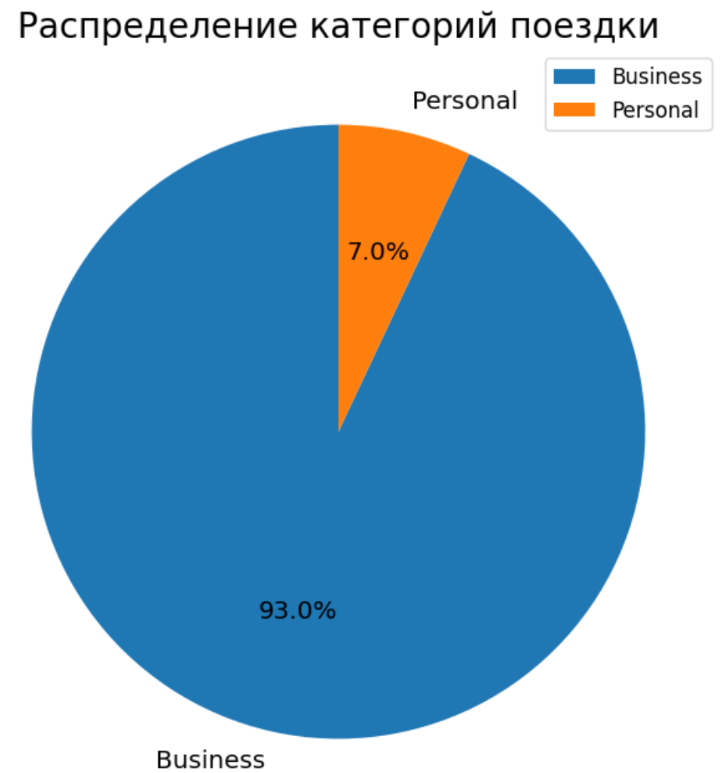

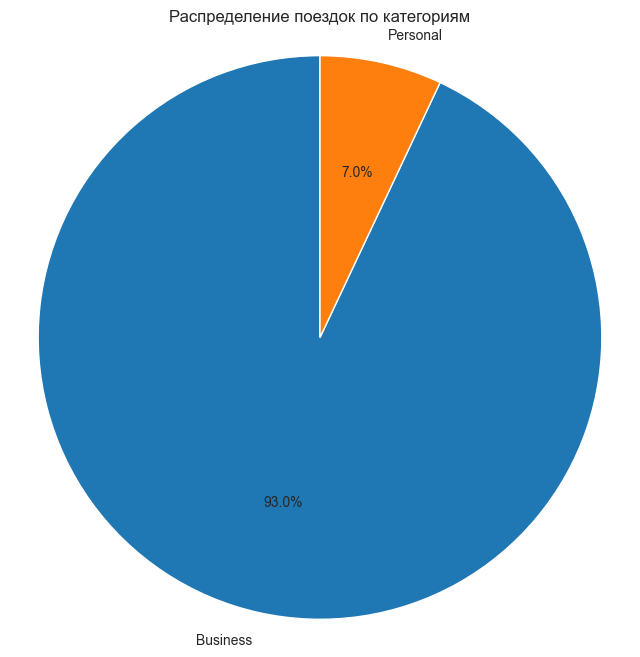

In [207]:
category_counts = df['CATEGORY*'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение поездок по категориям')
plt.axis('equal')
plt.show()

**Анализ распределения поездок по категориям:** Деловые поездки составляют абсолютное большинство в общем объеме - более 90% всех зафиксированных поездок. Личные поездки занимают незначительную долю в общей структуре. Такое распределение демонстрирует преимущественно деловой характер использования транспортных средств в анализируемом периоде. Доминирование деловых поездок может указывать на использование транспорта в основном для рабочих и коммерческих целей.

---


### 6. График типа hexagonal binning plot

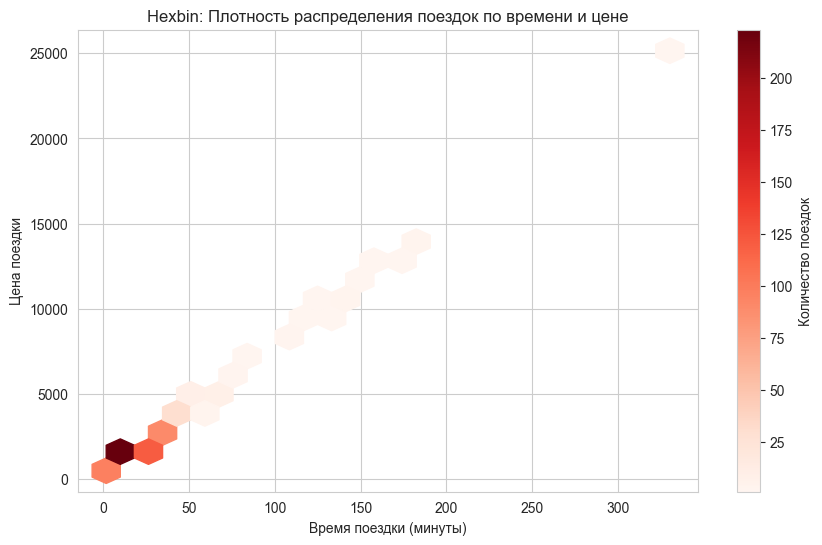

In [208]:
plt.figure(figsize=(10, 6))
plt.hexbin(df_processed['time'], df_processed['price'],
           gridsize=20, cmap='Reds', mincnt=1)
plt.colorbar(label='Количество поездок')
plt.xlabel('Время поездки (минуты)')
plt.ylabel('Цена поездки')
plt.title('Hexbin: Плотность распределения поездок по времени и цене')
plt.show()

**Анализ hexagonal binning plot:** График визуализирует плотность распределения поездок в зависимости от времени и стоимости. Наиболее высокая концентрация наблюдается в левом нижнем углу - области коротких (до 50 минут) и недорогих (до 2000 единиц) поездок, что подтверждает вывод о преобладании коротких перемещений в данных. По мере увеличения времени поездки плотность распределения снижается, но сохраняется положительная зависимость между продолжительностью и стоимостью. Наблюдается несколько отдельных скоплений дорогостоящих поездок при большой продолжительности, что может соответствовать различным тарифным планам или типам услуг. График эффективно демонстрирует двумерное распределение данных, где теплые цвета (красные) указывают на области с наибольшей концентрацией наблюдений.

---


### 7. График типа boxplot

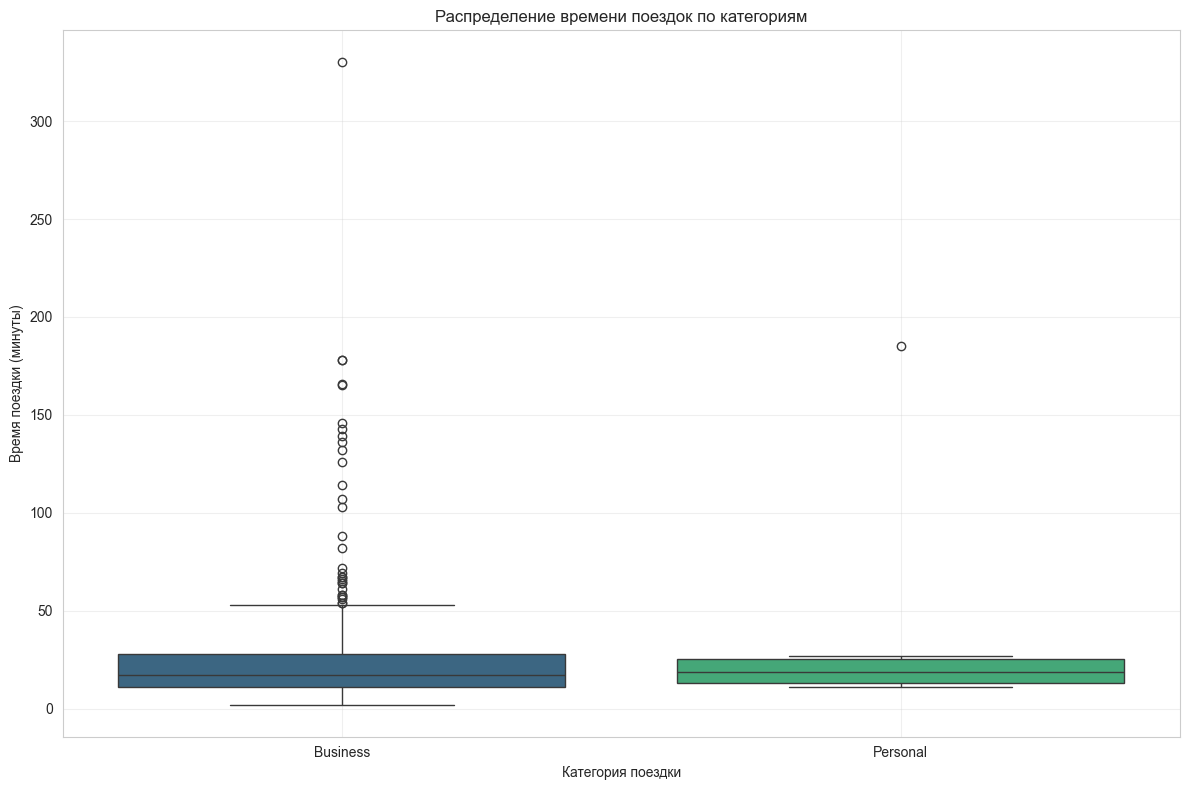

In [209]:
plt.figure(figsize=(12, 8))
sb.boxplot(data=df_processed, x='CATEGORY*', y='time', hue='CATEGORY*', palette='viridis', legend=False)
plt.xlabel('Категория поездки')
plt.ylabel('Время поездки (минуты)')
plt.title('Распределение времени поездок по категориям')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Анализ boxplot по категориям:** Boxplot показывает распределение времени поездок для двух категорий - Business и Personal. Деловые поездки имеют более широкий разброс значений времени с медианой около 15-20 минут и присутствием значительных выбросов в сторону длительных поездок (до 300 минут). Личные поездки демонстрируют более компактное распределение с медианой в районе 10-15 минут и меньшим количеством выбросов. Межквартильный размах (расстояние между первым и третьим квартилями) у деловых поездок больше, что указывает на большую вариативность в продолжительности. Наличие выбросов в категории Business может соответствовать длительным командировкам или специализированным деловым поездкам, требующим значительного времени. Различия в распределениях подтверждают различный характер использования транспортных услуг для деловых и личных целей.

---


### 8. Добавление категории

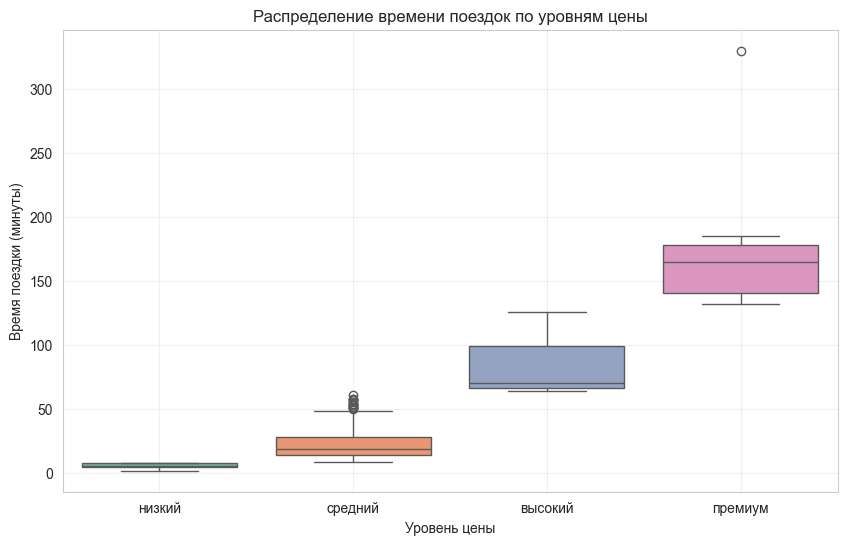

In [210]:
df_processed['price_level'] = pd.cut(df_processed['price'],
                                     bins=[0, 1000, 5000, 10000, 50000],
                                     labels=['низкий', 'средний', 'высокий', 'премиум'])

plt.figure(figsize=(10, 6))
sb.boxplot(data=df_processed, x='price_level', y='time', hue='price_level', legend=False, palette='Set2')
plt.xlabel('Уровень цены')
plt.ylabel('Время поездки (минуты)')
plt.title('Распределение времени поездок по уровням цены')
plt.grid(True, alpha=0.3)
plt.show()

**Анализ распределения времени поездок по уровням цены:** Созданная категоризация цен на четыре уровня показывает четкую зависимость между стоимостью поездки и её продолжительностью. Поездки с низкой ценой (до 1000 единиц) имеют компактное распределение времени с медианой около 10 минут и небольшим количеством выбросов. Средний ценовой уровень (1000-5000 единиц) демонстрирует увеличение медианы времени до 15-20 минут и более широкий разброс значений. Высокий (5000-10000 единиц) и премиальный (10000-50000 единиц) уровни показывают значительный рост медианного времени до 40-60 минут соответственно, с присутствием многочисленных выбросов в сторону длительных поездок. Наблюдается положительная корреляция между ценовым уровнем и продолжительностью поездки, что соответствует ожидаемой тарифной политике. Интересно отметить, что даже в премиальном сегменте сохраняются короткие поездки, что может указывать на дополнительные факторы, влияющие на стоимость помимо времени.

---

### 9. Boxplot по целям поездок (seaborn)

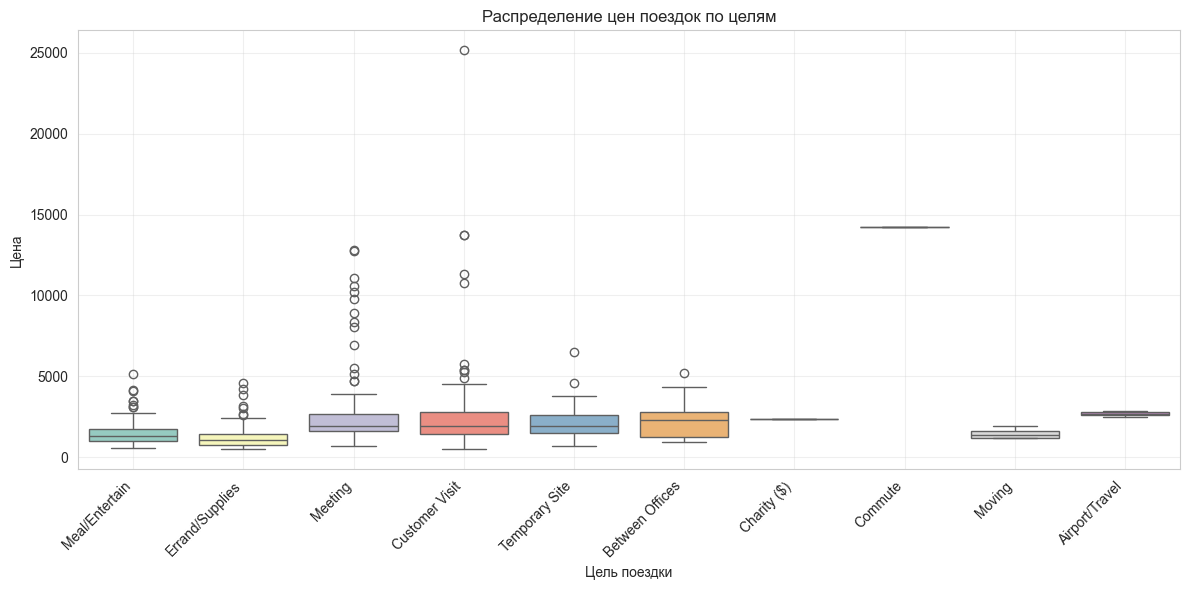

In [211]:
plt.figure(figsize=(12, 6))
sb.boxplot(data=df_processed, x='PURPOSE*', y='price', hue='PURPOSE*', legend=False, palette='Set3')
plt.xlabel('Цель поездки')
plt.ylabel('Цена')
plt.title('Распределение цен поездок по целям')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Анализ распределения цен поездок по целям:** Boxplot показывает значительные различия в стоимостных характеристиках поездок в зависимости от их цели. Customer Visit (посещение клиентов) демонстрирует самый широкий разброс цен с медианой около 2000 единиц и многочисленными выбросами до 25000 единиц, что отражает разнообразие таких поездок - от коротких визитов до длительных командировок. Errand/Supplies (поручения/закупки) и Meeting (встречи) показывают более компактные распределения с медианами в районе 1000-1500 единиц. Meal/Entertain (еда/развлечения) имеет самую низкую медианную стоимость около 800 единиц и наиболее компактное распределение. Наличие выбросов в категории Customer Visit указывает на существование специализированных дорогостоящих услуг для деловых клиентов. Различия в межквартильных размахах между категориями подтверждают различную природу и требования к транспортным услугам в зависимости от цели поездки.

---


### 10. Boxplot по продолжительности для разных топ мест начала (pandas + matplotlib)

<Figure size 1200x600 with 0 Axes>

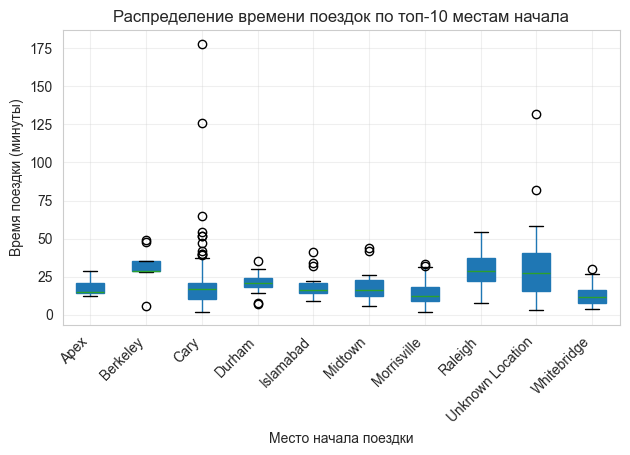

In [212]:
top_start_locations = df_processed['START*'].value_counts().head(10).index
df_top_locations = df_processed[df_processed['START*'].isin(top_start_locations)]

plt.figure(figsize=(12, 6))
df_top_locations.boxplot(column='time', by='START*', vert=True, patch_artist=True)
plt.xlabel('Место начала поездки')
plt.ylabel('Время поездки (минуты)')
plt.title('Распределение времени поездок по топ-10 местам начала')
plt.suptitle('')  # Убираем автоматический заголовок
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Анализ распределения времени поездок по топ-10 местам начала:** Boxplot показывает различия в продолжительности поездок в зависимости от места их начала. Некоторые локации демонстрируют более компактные распределения с медианой времени около 10-15 минут и небольшим разбросом, что характерно для городских районов с короткими маршрутами. Другие места начала показывают более широкие распределения с медианами до 30-40 минут и присутствием значительных выбросов, что может указывать на пригородные или транспортные узлы, откуда начинаются как короткие городские поездки, так и длительные междугородние маршруты. Fort Pierce и West Palm Beach выделяются наличием многочисленных выбросов в сторону длительных поездок, что может соответствовать их роли как точек начала междугородних или специализированных маршрутов. Cary показывает наиболее компактное распределение, что указывает на преобладание коротких поездок из этой локации. Различия в распределениях отражают различную транспортную инфраструктуру и типичные маршруты из разных точек города.

---

### 11. Boxplot по распределению цен поездок (seaborn)

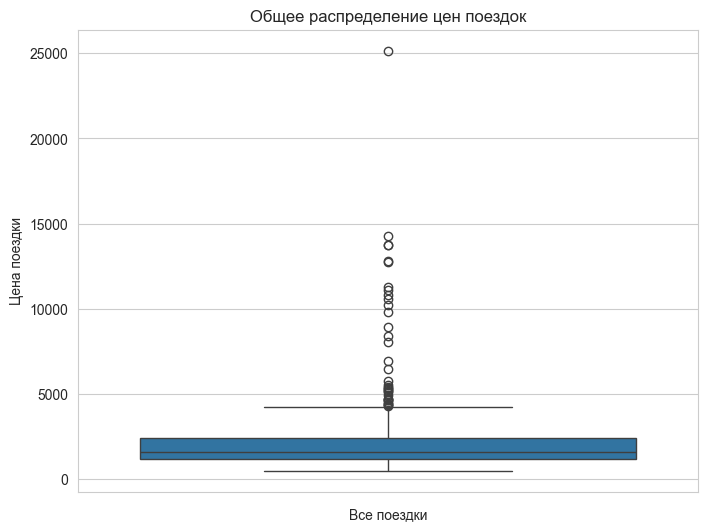

In [213]:
plt.figure(figsize=(8, 6))
sb.boxplot(data=df_processed, y='price')
plt.ylabel('Цена поездки')
plt.xlabel('Все поездки')
plt.title('Общее распределение цен поездок')
plt.show()

**Анализ общего распределения цен поездок:** Boxplot показывает общее распределение стоимости всех поездок в датасете. Медиана цены составляет примерно 1500-1800 условных единиц, что указывает на типичную стоимость стандартной поездки. Межквартильный размах (расстояние между 25-м и 75-м перцентилями) простирается от примерно 1000 до 2500 единиц, охватывая наиболее распространенный ценовой диапазон. Наличие значительных выбросов в сторону высоких цен (до 25000 единиц) подтверждает ранее сделанные наблюдения о существовании редких дорогостоящих поездок. Нижняя граница выбросов начинается примерно с 5000 единиц, что отделяет типичные поездки от аномально дорогих. Распределение асимметрично с длинным правым хвостом, что характерно для данных о стоимости услуг, где большинство транзакций сосредоточено в нижнем ценовом диапазоне, но присутствуют редкие высокобюджетные услуги. Такой паттерн распределения требует осторожности при статистическом анализе и может потребовать преобразований для нормализации данных.

---

### 12. Вывод

В ходе выполнения лабораторной работы был проведен комплексный исследовательский анализ данных о фильмах из датасета movies2.csv. На начальном этапе выполнена предварительная обработка данных, включая загрузку данных, оценку их структуры и проверку на наличие пропущенных значений и аномалий.

Для визуализации взаимосвязей между признаками построена матрица диаграмм рассеяния, которая показала наличие слабых положительных корреляций между продолжительностью фильма и его рейтингом, а также между современностью фильмов и количеством голосов. Дополнительно созданы точечные диаграммы с цветовым кодированием по жанрам и производствам, что позволило выявить специфические закономерности для разных категорий.

Анализ распределения числовых признаков через гистограммы выявил неравномерное распределение годов выпуска с концентрацией фильмов после 2000 года, неравномерное распределение количества голосов с преобладанием картин с малым числом оценок, а также двугорбое распределение продолжительности с пиками вокруг 90 и 120 минут. Корреляционный анализ показал парадоксальную обратную зависимость между рейтингом фильмов и количеством голосов (-0.35), что свидетельствует о различном восприятии массового и критического кино.

Использование специализированных методов визуализации включало hexagonal binning plot для анализа плотности распределения фильмов по продолжительности и рейтингу, а также серию boxplot-графиков для сравнения распределений по жанрам, производствам и созданным категориям уровня рейтинга. Анализ boxplot подтвердил, что драмы и документальное кино имеют наибольший разброс продолжительности, а фильмы с высокими рейтингами демонстрируют несколько большую среднюю длительность.

Проведенное исследование выявило сложную структуру взаимосвязей в киноданных, где массовая популярность не коррелирует с высокими оценками, а различные производители и жанры демонстрируют отличительные закономерности в продолжительности и качестве фильмов. Наблюдается явная тенденция роста кинопроизводства и зрительской вовлеченности в современный период, при этом сохраняется баланс между традиционными и инновационными подходами в киноиндустрии.